In [1]:
import csv

#saving results to csv file

csvData = [['Wits', 'UP','UCT','WitsProtests','Protests','Adam'], 
           ['positive', 'positive','positive',' ','positive','positive'], 
           ['positive', 'positive','negative',' ','positive',' '], 
           ['positive', 'negative','neutral',' ','positive',' '],
           ['positive','negative','neutral',' ','negative',' '],
           ['neutral','neutral',' ',' ',' ',' '],
           ['negative','neutral',' ',' ',' ',' ']]

with open('witstuks.csv', 'w') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerows(csvData)

csvFile.close()

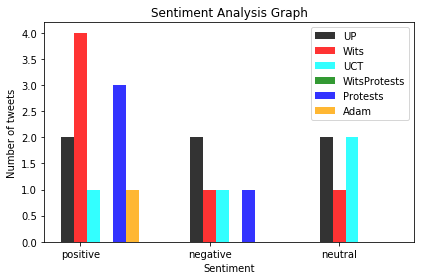

In [7]:
import csv
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np

n_groups = 3

#counting the number of times that positive,negative,neutral occur

with open('witstuks.csv', 'r') as data:
    counter = Counter()
    for row in csv.DictReader(data):
        counter[row['UP']] += 1

    positive = counter['positive']
    negative = counter['negative']
    neutral = counter['neutral']
        
tuks_results = [positive,negative,neutral]

with open('witstuks.csv', 'r') as data:
    counter = Counter()
    for row in csv.DictReader(data):
        counter[row['Wits']] += 1
        
    positive1 = counter['positive']
    negative1 = counter['negative']
    neutral1 = counter['neutral']

wits_results = [positive1,negative1,neutral1]

with open('witstuks.csv', 'r') as data:
    counter = Counter()
    for row in csv.DictReader(data):
        counter[row['UCT']] += 1
        
    positive2 = counter['positive']
    negative2 = counter['negative']
    neutral2 = counter['neutral']

uct_results = [positive2,negative2,neutral2]

with open('witstuks.csv', 'r') as data:
    counter = Counter()
    for row in csv.DictReader(data):
        counter[row['WitsProtests']] += 1
        
    positive3 = counter['positive']
    negative3 = counter['negative']
    neutral3 = counter['neutral']

witsprotests_results = [positive3,negative3,neutral3]

with open('witstuks.csv', 'r') as data:
    counter = Counter()
    for row in csv.DictReader(data):
        counter[row['Protests']] += 1
        
    positive4 = counter['positive']
    negative4 = counter['negative']
    neutral4 = counter['neutral']

protests_results = [positive4,negative4,neutral4]

with open('witstuks.csv', 'r') as data:
    counter = Counter()
    for row in csv.DictReader(data):
        counter[row['Adam']] += 1
        
    positive5 = counter['positive']
    negative5 = counter['negative']
    neutral5 = counter['neutral']

adam_results = [positive5,negative5,neutral5]

#contructing the graphs

fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.10
opacity = 0.8

rects1 = plt.bar(index, tuks_results, bar_width,
alpha=opacity,
color='black',
label='UP')

rects2 = plt.bar(index + bar_width, wits_results, bar_width,
alpha=opacity,
color='red',
label='Wits')

rects3 = plt.bar(index + bar_width+bar_width, uct_results, bar_width,
alpha=opacity,
color='cyan',
label='UCT')

rects4 = plt.bar(index +bar_width+bar_width+bar_width, witsprotests_results, bar_width,
alpha=opacity,
color='green',
label='WitsProtests')

rects5 = plt.bar(index + bar_width+bar_width+bar_width+bar_width, protests_results, bar_width,
alpha=opacity,
color='blue',
label='Protests')

rects6 = plt.bar(index + bar_width+bar_width+bar_width+bar_width+bar_width, adam_results, bar_width,
alpha=opacity,
color='orange',
label='Adam')

plt.xlabel('Sentiment')
plt.ylabel('Number of tweets')
plt.title('Sentiment Analysis Graph')
plt.xticks(index + bar_width, ('positive', 'negative','neutral'))
plt.legend()
plt.tight_layout()
#plt.savefig('sentiment_analysis_graph.png')

plt.show()